## 1. Описание данных
Для выполнения заданий предлагается использовать исторические данные об акциях компании Apple Inc. (AAPL), или любой другой источник

 Источник данных:
•	Прикрепленный файл

Структура данных:
•	Столбцы:
•	Date (дата),
•	Open (цена открытия),
•	High (максимальная цена),
•	Low (минимальная цена),
•	Close (цена закрытия),
•	Volume (объем торгов).
•	Индекс: DatetimeIndex с ежедневными значениями.
•	Типы данных: числовые (float64 для цен, int64 для объема).


## 2. Задания
Ниже приведены задания, которые необходимо выполнить с использованием Python и указанных библиотек (pandas, matplotlib, statsmodels, pmdarima). Каждое задание включает обработку данных, визуализацию и/или моделирование.

### 1.	Загрузка и предобработка данных
o	Загрузите данные об акциях AAPL с помощью библиотеки yfinance.
o	Преобразуйте столбец Date в формат datetime и установите его как индекс.
o	Проверьте данные на наличие пропущенных значений и удалите их с помощью метода dropna().
o	Убедитесь, что структура данных корректна (столбцы: open, high, low, close, volume).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
#from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('dataset.csv', parse_dates=['Date'], index_col='Date')

In [ ]:
data.head()

,close,high,low,open,volume
Date,,,,,
2015-01-02,24.288584,24.757338,23.848709,24.746230,212818400
2015-01-05,23.604338,24.137518,23.417725,24.057541,257142000
2015-01-06,23.606554,23.866479,23.244435,23.668758,263188400
2015-01-07,23.937569,24.037539,23.704302,23.815381,160423600
2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000


In [ ]:
print(data.isnull().sum())

close     0
high      0
low       0
open      0
volume    0
dtype: int64


In [ ]:
data = data.dropna()
print(data.isnull().sum())

close     0
high      0
low       0
open      0
volume    0
dtype: int64


In [ ]:
print(data.head())

                close       high        low       open     volume
Date                                                             
2015-01-02  24.288584  24.757338  23.848709  24.746230  212818400
2015-01-05  23.604338  24.137518  23.417725  24.057541  257142000
2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
2015-01-07  23.937569  24.037539  23.704302  23.815381  160423600
2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2613 entries, 2015-01-02 to 2025-05-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2613 non-null   float64
 1   high    2613 non-null   float64
 2   low     2613 non-null   float64
 3   open    2613 non-null   float64
 4   volume  2613 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 122.5 KB
None


### 2.	Визуализация временных рядов
o	Постройте линейный график для столбца close (цена закрытия) за весь период (2015–2025).
o	Постройте столбчатую диаграмму, показывающую среднюю месячную цену закрытия (используйте resample('M').mean() для группировки по месяцам).
o	Постройте гистограмму для столбца volume (объем торгов) с 50 интервалами для анализа распределения.


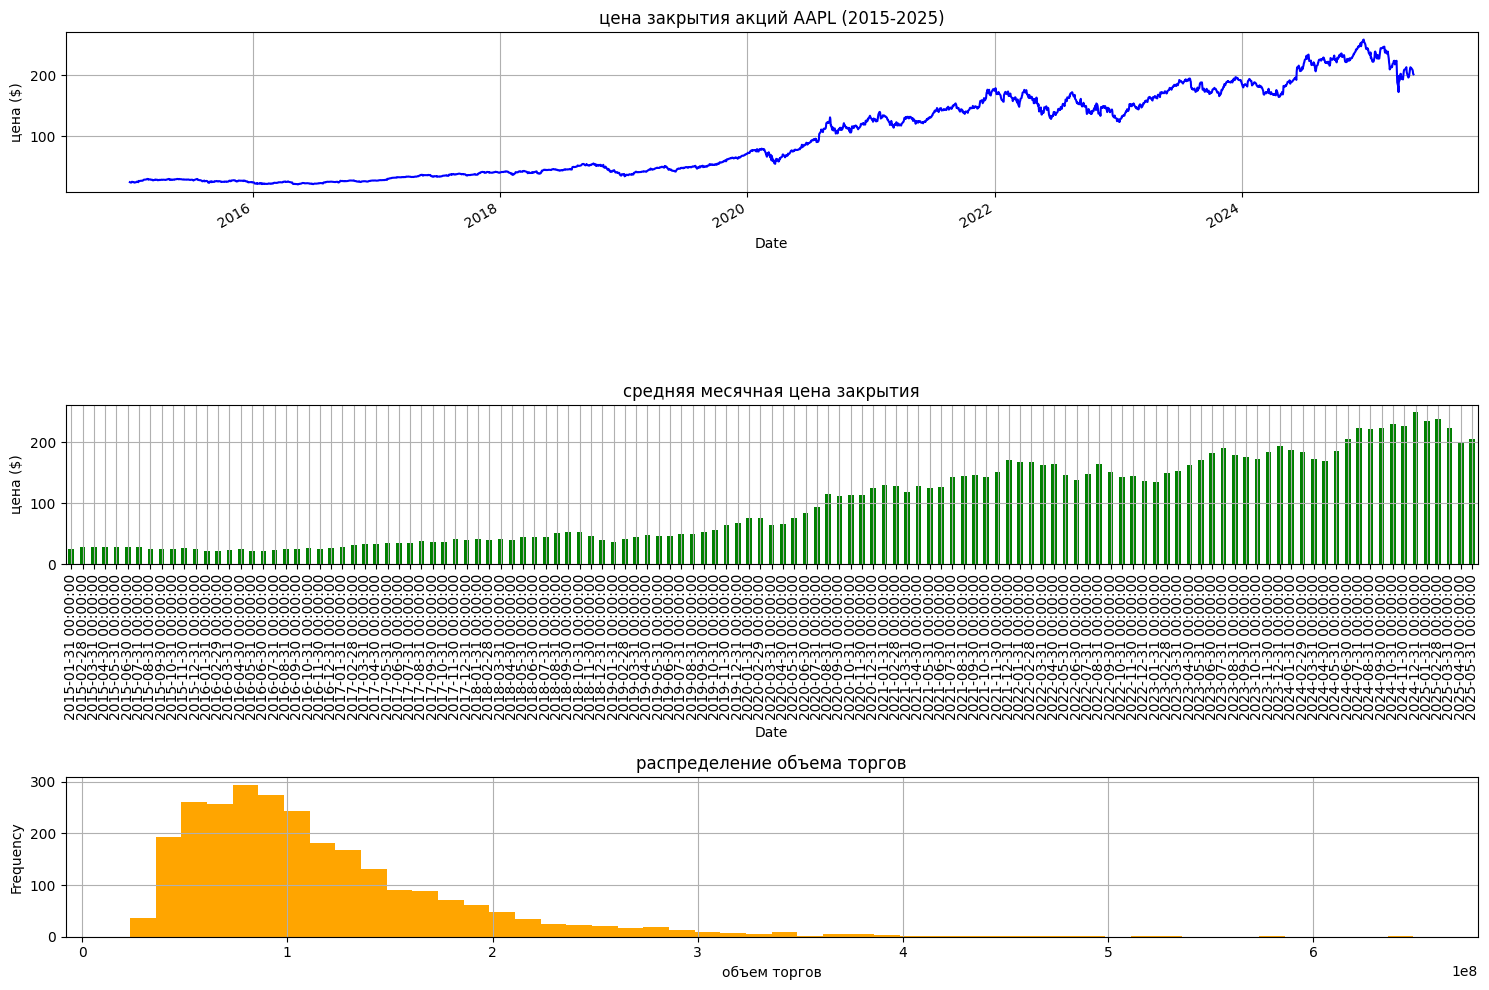

In [ ]:
plt.figure(figsize=(15, 10))

# График цены закрытия
plt.subplot(3, 1, 1)
data['close'].plot(title='цена закрытия акций AAPL (2015-2025)', color='blue')
plt.ylabel('цена ($)')
plt.grid(True)

# Средняя месячная цена закрытия
plt.subplot(3, 1, 2)
data['close'].resample('M').mean().plot(kind='bar', title='средняя месячная цена закрытия', color='green')
plt.ylabel('цена ($)')
plt.grid(True)

# Гистограмма объема торгов
plt.subplot(3, 1, 3)
data['volume'].plot(kind='hist', bins=50, title='распределение объема торгов', color='orange')
plt.xlabel('объем торгов')
plt.grid(True)

plt.tight_layout()
plt.show()

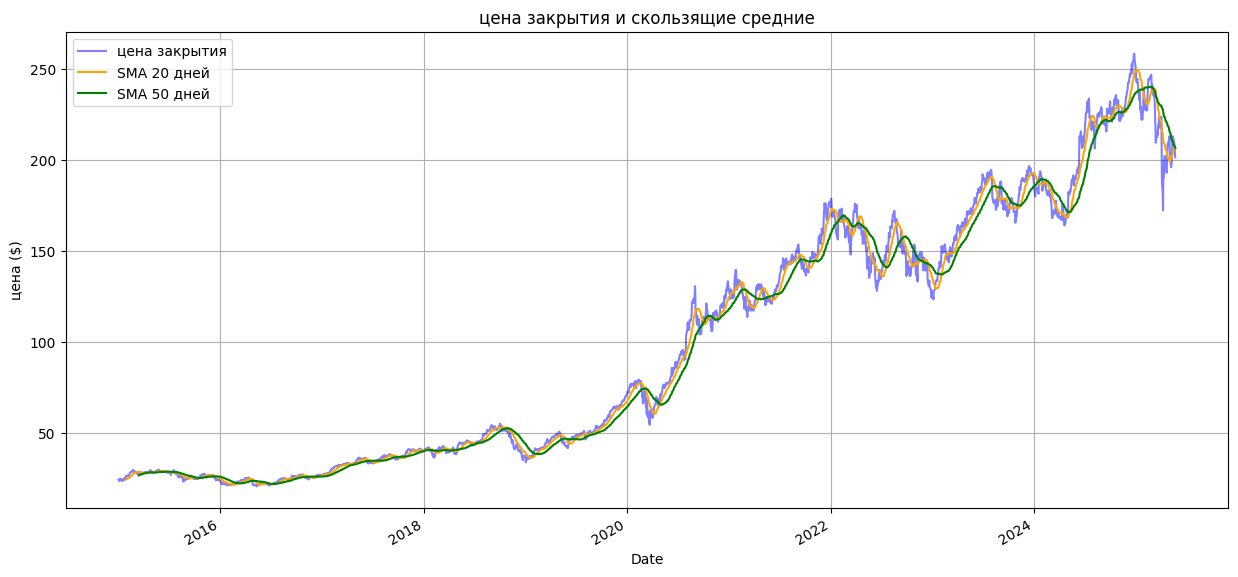

In [ ]:
# Расчет скользящих средних
data['SMA20'] = data['close'].rolling(window=20).mean()
data['SMA50'] = data['close'].rolling(window=50).mean()

# Визуализация
plt.figure(figsize=(15, 7))
data['close'].plot(label='цена закрытия', color='blue', alpha=0.5)
data['SMA20'].plot(label='SMA 20 дней', color='orange')
data['SMA50'].plot(label='SMA 50 дней', color='green')

plt.title('цена закрытия и скользящие средние')
plt.ylabel('цена ($)')
plt.legend()
plt.grid(True)
plt.show()

### 3.	Анализ скользящего среднего
o	Рассчитайте простое скользящее среднее (SMA) для столбца close с окнами 20 дней и 50 дней.
o	Постройте линейный график, отображающий цену закрытия (close) и оба скользящих средних на одном графике.
o	Проанализируйте, как скользящие средние помогают выявить тренды в данных (например, пересечения SMA20 и SMA50 как сигналы покупки/продажи).


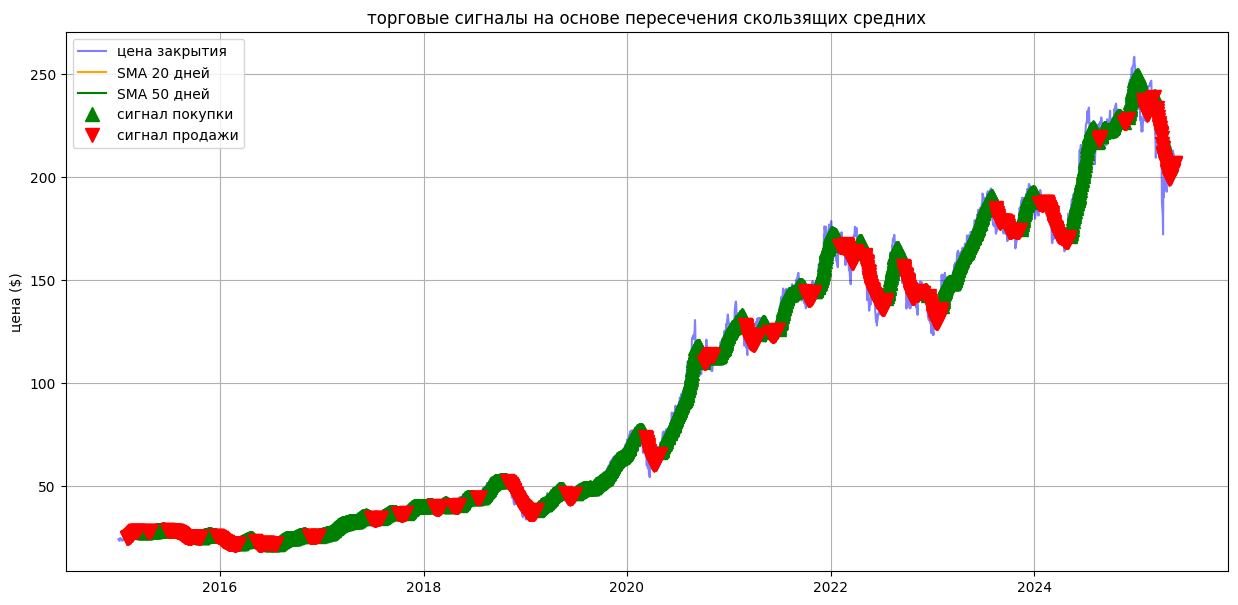

In [ ]:
import numpy as np

# Анализ пересечений
data['Signal'] = 0
data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, -1)

plt.figure(figsize=(15, 7))
plt.plot(data['close'], label='цена закрытия', color='blue', alpha=0.5)
plt.plot(data['SMA20'], label='SMA 20 дней', color='orange')
plt.plot(data['SMA50'], label='SMA 50 дней', color='green')

# Отметки сигналов покупки/продажи
plt.plot(data[data['Signal'] == 1].index,
         data['SMA20'][data['Signal'] == 1],
         '^', markersize=10, color='g', label='сигнал покупки')
plt.plot(data[data['Signal'] == -1].index,
         data['SMA20'][data['Signal'] == -1],
         'v', markersize=10, color='r', label='сигнал продажи')

plt.title('торговые сигналы на основе пересечения скользящих средних')
plt.ylabel('цена ($)')
plt.legend()
plt.grid(True)
plt.show()

### 4.	Прогнозирование с использованием модели ARIMA
o	Выполните декомпозицию временного ряда close на тренд, сезонность и остатки с помощью seasonal_decompose (используйте период 252 дня — количество торговых дней в году).
o	Постройте модель ARIMA для прогнозирования цены закрытия на следующие 30 дней.
o	Подберите параметры модели (p, d, q) автоматически с помощью auto_arima.
o	Визуализируйте прогноз и сравните его с последними 100 днями исторических данных.


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

train = data['close'][:-100]
test = data['close'][-100:]

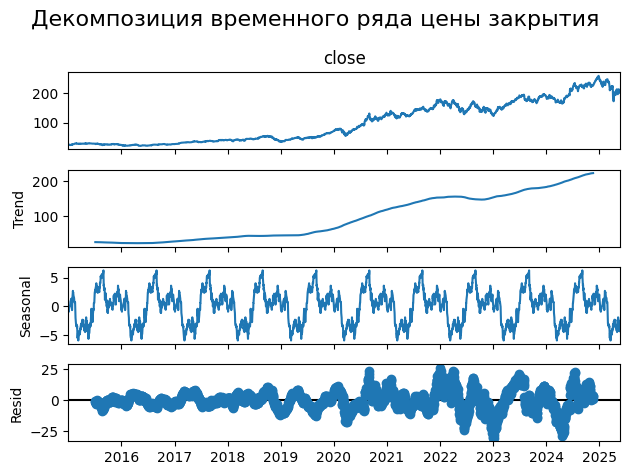

In [ ]:
decomposition = seasonal_decompose(data['close'], period=252)
decomposition.plot()
plt.suptitle('Декомпозиция временного ряда цены закрытия', fontsize=16)
plt.tight_layout()
plt.show()

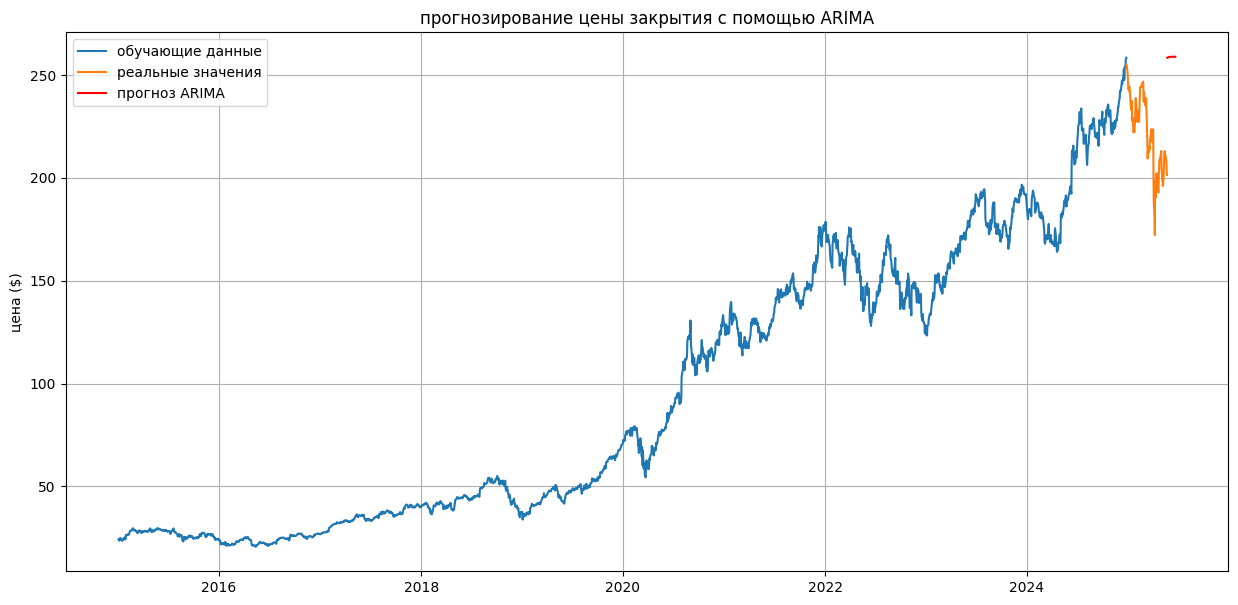

In [ ]:
# Обучение ARIMA модели
arima_model = ARIMA(train, order=(5, 1, 2))
arima_result = arima_model.fit()

# Прогноз на 30 дней
arima_forecast = arima_result.forecast(steps=30)

# Визуализация
plt.figure(figsize=(15, 7))
plt.plot(train.index, train, label='обучающие данные')
plt.plot(test.index, test, label='реальные значения')
plt.plot(pd.date_range(start=test.index[-1], periods=31)[1:],
         arima_forecast, label='прогноз ARIMA', color='red')
plt.title('прогнозирование цены закрытия с помощью ARIMA')
plt.ylabel('цена ($)')
plt.legend()
plt.grid(True)
plt.show()

### 5.	Прогнозирование с использованием модели SARIMA
o	Постройте модель SARIMA для учета сезонности в данных (например, с сезонным порядком (1, 1, 1, 12) для годовой сезонности).
o	Выполните прогноз на 30 дней с помощью SARIMA.
o	Сравните визуально прогнозы ARIMA и SARIMA на одном графике с историческими данными.


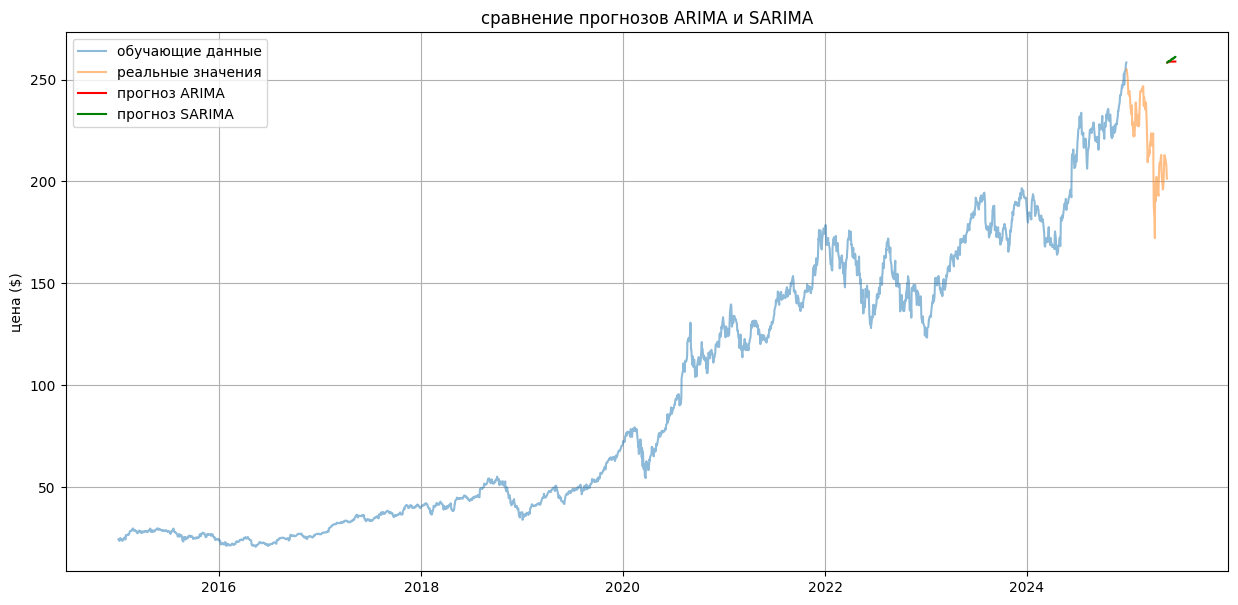

In [ ]:
# Обучение SARIMA модели
sarima_model = SARIMAX(train,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Прогноз
sarima_forecast = sarima_result.forecast(steps=30)

# Визуализация сравнения
plt.figure(figsize=(15, 7))
plt.plot(train.index, train, label='обучающие данные', alpha=0.5)
plt.plot(test.index, test, label='реальные значения', alpha=0.5)
plt.plot(pd.date_range(start=test.index[-1], periods=31)[1:],
         arima_forecast, label='прогноз ARIMA', color='red')
plt.plot(pd.date_range(start=test.index[-1], periods=31)[1:],
         sarima_forecast, label='прогноз SARIMA', color='green')
plt.title('сравнение прогнозов ARIMA и SARIMA')
plt.ylabel('цена ($)')
plt.legend()
plt.grid(True)
plt.show()